<div class="jp-Cell-inputWrapper">

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown">

# Arocom IT Solutions Private Ltd

</div>

</div>

<div class="jp-Cell-inputWrapper">

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown">

**Domain:** Warehouse shipping

**Context** An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

**Feature Description** The dataset used for model building contained 10999 observations of 12 variables. The data contains the following information:

*   ID: ID Number of Customers.

*   Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

*   Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

*   Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

*   Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

*   Cost of the product: Cost of the Product in US Dollars.

*   Prior purchases: The Number of Prior Purchase.

*   Product importance: The company has categorized the product in the various parameter such as low, medium, high.

*   Gender: Male and Female.

*   Discount offered: Discount offered on that specific product.

*   Weight in gms: It is the weight in grams.

*   Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

</div>

</div>

<div class="jp-Cell-inputWrapper">

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown">

#### Project Objective[¶](#Project-Objective)

This data of Product Shipment Tracking, answer instantly to your questions:

*   What was Customer Rating? And was the product delivered on time?
*   Is Customer query is being answered?
*   If Product importance is high. having higest rating or being delivered on time?

</div>

</div>

<div class="jp-Cell-inputWrapper">

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown">

**Steps to the project:**

**1\. Load the dataset:**

*   Import data and Explore shape and size.

**2\. Data cleansing:**

*   Missing value treatment

*   Convert categorical attributes to continuous using relevant functional knowledge

*   Drop attribute/s if required using relevant functional knowledge

*   Automate all the above steps

**3\. Data analysis & visualisation:**

*   Perform detailed statistical analysis on the data. •
*   Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

**4\. Data pre-processing:**

*   Segregate predictors vs target attributes

*   Check for target balancing and fix it if found imbalanced.

*   Perform train-test split.

*   Check if the train and test data have similar statistical characteristics when compared with original data.

**5\. Model training, testing and tuning:**

*   Train and test all ensemble models taught in the learning module.

*   Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.

*   Display the classification accuracies for train and test data.

*   Apply all the possible tuning techniques to train the best model for the given data.

*   Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

*   Display and compare all the models designed with their train and test accuracies.

*   Select the final best trained model along with your detailed comments for selecting this model.

*   Pickle the selected model for future use.

**6\. GUI development:**

*   Design a clickable web service application.

*   This application should allow the user to input all future values and on a click use these values on the trained model above to predict.

*   It should display the prediction.

**7\. Conclusion and improvisation:**

*   Write your conclusion on the results.

*   Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points perform a better data analysis in future.

</div>

</div>



In [1]:
#connect to google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Load the Dataset

In [3]:
#Importing the necessary libraries for analysing and loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn. metrics import classification_report

In [7]:
df = pd.read_csv('/content/drive/MyDrive/product_shipment (2).csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [8]:
# gives us the number of rows and columns in (rows,columns)
df.shape 

(10999, 12)

In [9]:
# Looking at what all types of data is present in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**we see that there are some non integers which might cause problems while developing
the model. So we shall deal with the objects in the data cleansing part**

In [10]:
# gives us basic statistical insight about each column
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


# 2. Data cleansing

In [11]:
#
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

# 3. Data Analysis

**There seem to be no missing values at all, hence we can skip this step**

In [12]:
object1 = df.select_dtypes(include='object').columns
float1 = df.select_dtypes(exclude = 'object').columns
float1

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

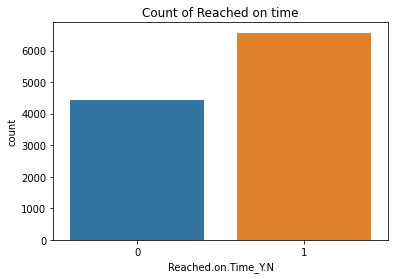

In [13]:
plt.title('Count of Reached on time')
sns.countplot(x ='Reached.on.Time_Y.N',  data = df)

Roughly 40% reached on time and 60% did not.




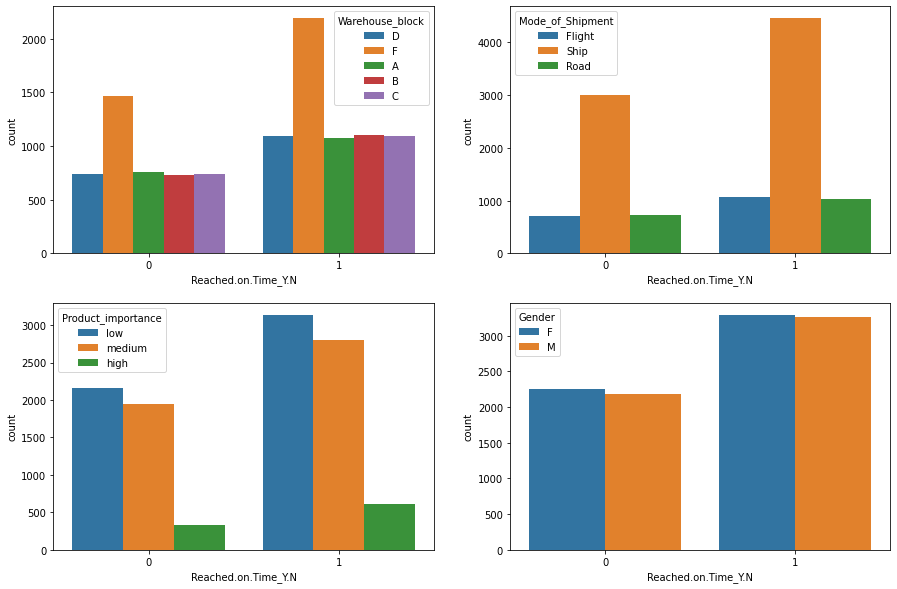

In [14]:
i = 1
plt.figure(figsize = (15,10))
for col in object1:
    plt.subplot(2,2,i)
    sns.countplot(x = 'Reached.on.Time_Y.N',hue = df[col] , data = df)
    i +=1

All these features don't seem important as all the plots for y=1 seem like proportionally enlarged versions of the plots on the left

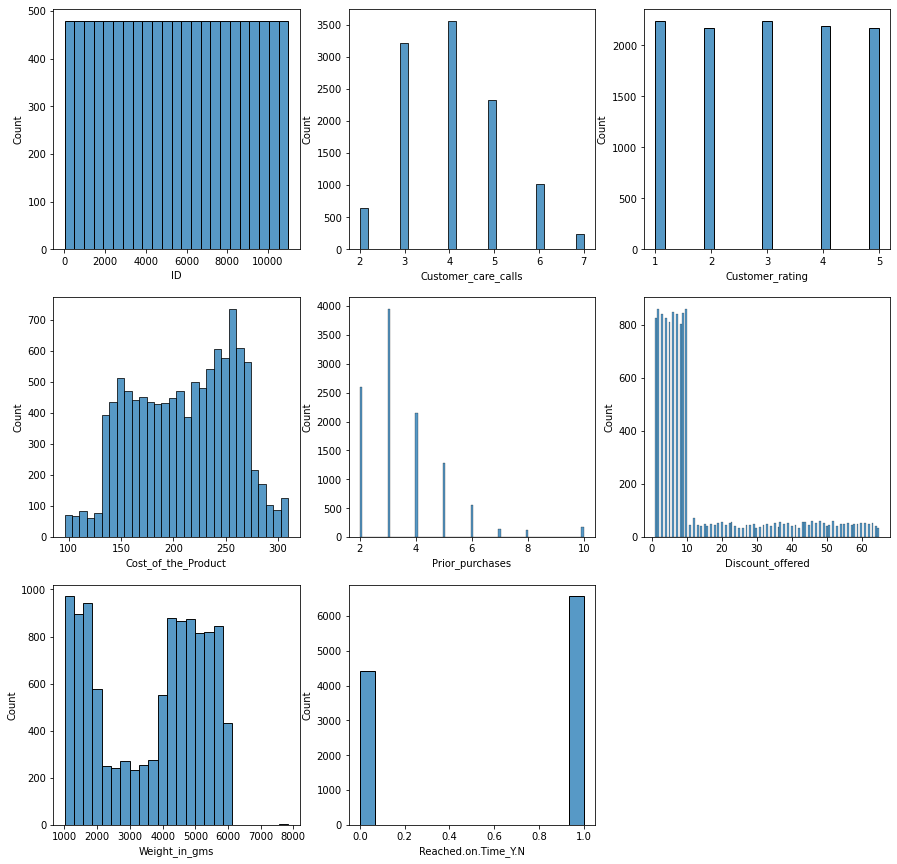

In [15]:
i = 1
plt.figure(figsize = (15,15))
for col in float1:
    plt.subplot(3,3,i)
    sns.histplot(x = df[col])
    i +=1


Distribution of values of the numeric features

** *italicized text*What was Customer Rating? And was the product delivered on time?**

In [16]:
cust=df.groupby('Customer_rating')['Reached.on.Time_Y.N'].mean().to_frame()
cust

,Reached.on.Time_Y.N
Customer_rating,
1,0.587472
2,0.587991
3,0.606074
4,0.595249
5,0.606633


Customer rating does not have a strong correlation with product reaching on time



**Is Customer Query Being Answered**

In [17]:
custq=df.groupby('Customer_care_calls')['Reached.on.Time_Y.N'].mean().to_frame()
custq

,Reached.on.Time_Y.N
Customer_care_calls,
2,0.652038
3,0.625117
4,0.597695
5,0.584192
6,0.516288
7,0.516260


As expected, when shipment dont arrive on time, customer calls increase

*Doubt--how to know if it is resolved*


**Does Product Importance Matter**





In [18]:
Product_importance = df.groupby(["Product_importance"])["Reached.on.Time_Y.N"].mean().to_frame() 
Product_importance

,Reached.on.Time_Y.N
Product_importance,
high,0.649789
low,0.592788
medium,0.590450


High product importance reach more on time compared to low and medium,
However there is no difference between low and medium

**Is Product Importance and Customing Rating related**

In [19]:
PI = df.groupby(["Product_importance"])["Customer_rating"].mean().to_frame() 
PI

,Customer_rating
Product_importance,
high,2.993671
low,2.983576
medium,2.997686


It has no relation

**Does Cost of Product Matter**

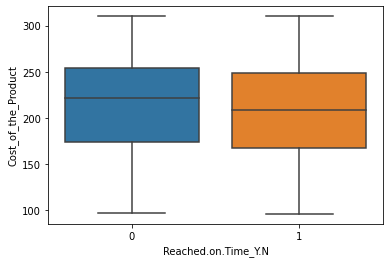

In [74]:
import seaborn as sns
sns.boxplot(x='Reached.on.Time_Y.N', y='Cost_of_the_Product', data=df)

In [20]:
df['Reached.on.Time_Y.N'].corr(df['Cost_of_the_Product'])

-0.07358721059030128

Surprisingly even cost of product doesn't matter much, and infact also has a slight negative correlation

In [21]:
#one-hot encoding
df1 = pd.get_dummies(df)

In [22]:
df1.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,1,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,2,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,3,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,4,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,5,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0


In [23]:
df1= df1.drop(['ID'],1)

In [24]:
df1

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,4,1,232,5,6,1247,0,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,5,4,242,5,4,1155,0,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,5,2,223,6,2,1210,0,0,0,0,0,1,0,0,1,0,0,1,0,1


In [25]:
def get_preprocessing(df):
  df = pd.get_dummies(df)
  df = df.drop(['ID'], axis = 1)
  df['Cost_per_Purchase'] = df['Cost_of_the_Product']/ df['Prior_purchases']
  df['Final_Cost'] = df['Cost_of_the_Product'] - df['Discount_offered']
  df['Cost_per_Weight'] = df['Cost_of_the_Product'] / df['Weight_in_gms']
  df['Calls_per_Rating'] = df['Customer_care_calls'] / df['Customer_rating']
  df['Calls_diff_Rating'] = df['Customer_care_calls'] - df['Customer_rating']
  df['Calls_per_Purchase'] = df['Customer_care_calls'] / df['Prior_purchases']
  df['Positivity'] = df['Customer_rating'] - df['Customer_care_calls']
  return df

In [26]:
df_with_added_features = get_preprocessing(df)
df_with_added_features

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M,Cost_per_Purchase,Final_Cost,Cost_per_Weight,Calls_per_Rating,Calls_diff_Rating,Calls_per_Purchase,Positivity
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0,59.000000,133,0.143552,2.00,2,1.333333,-2
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1,108.000000,157,0.069948,0.80,-1,2.000000,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1,45.750000,135,0.054238,1.00,0,0.500000,0
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1,44.000000,166,0.149533,1.00,0,0.750000,0
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0,61.333333,138,0.074074,1.00,0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,1,0,0,0,0,0,0,1,0,0,1,1,0,50.400000,251,0.163849,4.00,3,0.800000,-3
10995,4,1,232,5,6,1247,0,0,1,0,0,0,0,0,1,0,0,1,1,0,46.400000,226,0.186047,4.00,3,0.800000,-3
10996,5,4,242,5,4,1155,0,0,0,1,0,0,0,0,1,0,1,0,1,0,48.400000,238,0.209524,1.25,1,1.000000,-1
10997,5,2,223,6,2,1210,0,0,0,0,0,1,0,0,1,0,0,1,0,1,37.166667,221,0.184298,2.50,3,0.833333,-3


In [27]:
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
            'Reached.on.Time_Y.N', 'Cost_per_Purchase', 'Final_Cost', 
            'Cost_per_Weight', 'Calls_per_Rating', 'Calls_diff_Rating', 
            'Calls_per_Purchase', 'Positivity']

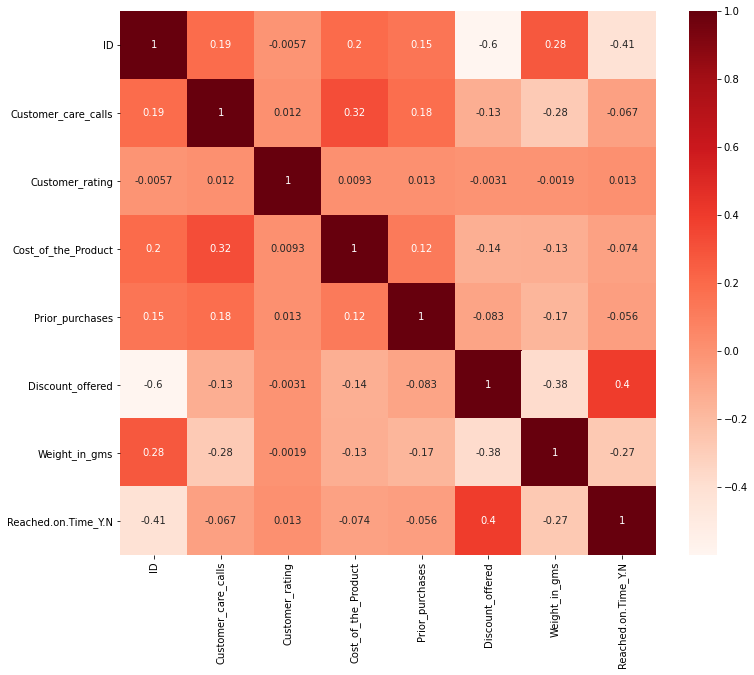

In [28]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Reached on time has high positive correlation with discount offered.**


In [85]:
dfmini=df[['Customer_care_calls','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N']]

In [86]:
Xmini = dfmini.drop(['Reached.on.Time_Y.N'],1)
ymini = dfmini['Reached.on.Time_Y.N']
kfold = KFold(n_splits=5, random_state=42,shuffle=True)
print("Cross-val accuracy:")
model = AdaBoostClassifier()
cv_results = cross_val_score(model, Xmini, ymini, cv=kfold, scoring='accuracy')
print(cv_results.mean())

Cross-val accuracy:
0.675334284178759


# Base Model: AdaBoostClassifier()

# 4(a). Data Preprocessing on original dataset


In [29]:
X = df1.drop(['Reached.on.Time_Y.N'],1)
y = df1['Reached.on.Time_Y.N']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [31]:
from sklearn. preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
print(X_train.shape)
print(y_train.shape)

(8799, 19)
(8799,)


# 4(b). Model Training on original dataset with base model


In [33]:
model = AdaBoostClassifier()

model.fit(X_train,y_train)
model_prediction = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Accuracy on test set:")
print(accuracy)

print(classification_report(y_test, model_prediction)) 

kfold = KFold(n_splits=5, random_state=42,shuffle=True)
print("Cross-val accuracy:")
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
print(cv_results.mean())

Accuracy on test set:
0.69
              precision    recall  f1-score   support

           0       0.58      0.81      0.67       872
           1       0.83      0.61      0.71      1328

    accuracy                           0.69      2200
   macro avg       0.70      0.71      0.69      2200
weighted avg       0.73      0.69      0.69      2200

Cross-val accuracy:
0.6718933148999948


# 5(a). Data Preprocessing on added_features dataset

In [34]:
X_added_features = df_with_added_features.drop(['Reached.on.Time_Y.N'],1)
y_added_features = df_with_added_features['Reached.on.Time_Y.N']

In [35]:
from sklearn.model_selection import train_test_split
X_train_added_features, X_test_added_features, y_train_added_features, y_test_added_features = train_test_split(X_added_features, y_added_features, test_size = 0.2, random_state = 43)

In [36]:
from sklearn. preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_added_features, y_train_added_features)
X_train_added_features = scaler.transform(X_train_added_features)
X_test_added_features = scaler.transform(X_test_added_features)

In [37]:
print(X_train_added_features.shape)
print(y_train_added_features.shape)

(8799, 26)
(8799,)


# 5(b). Model Training on added_features dataset with base model

In [38]:
model_added_features = AdaBoostClassifier()

model_added_features.fit(X_train_added_features,y_train_added_features)
model_prediction_added_features = model_added_features.predict(X_test_added_features)
accuracy = model_added_features.score(X_test_added_features,y_test_added_features)
print("Accuracy on test set: ")
print(accuracy)

print(classification_report(y_test_added_features, model_prediction_added_features)) 

kfold = KFold(n_splits=10, random_state=42,shuffle=True)
print("Cross-val accuracy:")
cv_results = cross_val_score(model_added_features, X_train_added_features, y_train_added_features, cv=kfold, scoring='accuracy')
print(cv_results.mean())

Accuracy on test set: 
0.6822727272727273
              precision    recall  f1-score   support

           0       0.56      0.88      0.69       872
           1       0.87      0.55      0.68      1328

    accuracy                           0.68      2200
   macro avg       0.72      0.72      0.68      2200
weighted avg       0.75      0.68      0.68      2200

Cross-val accuracy:
0.6753036766987279


# Observations: The dataset with added features performs better in all metrics used. Hence, we shall choose df_with_added_features as the final dataset

# Models to be tested


In [39]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
for name, model in models:
  kfold = KFold(n_splits=5, random_state=42,shuffle=True)
  cv_result = cross_val_score(model, X_train_added_features, y_train_added_features, cv=kfold, scoring='accuracy')
  model.fit(X_train_added_features, y_train_added_features)
  model_predictions = model.predict(X_test_added_features)
  accuracy = model.score(X_test_added_features,y_test_added_features)
  msg = "%s: Accuracy on test set: %f Cross_val accuracy: (%f)" % (name, accuracy, cv_result.mean())
  print(msg)

LR: Accuracy on test set: 0.664091 Cross_val accuracy: (0.651550)
LDA: Accuracy on test set: 0.657727 Cross_val accuracy: (0.655186)
CART: Accuracy on test set: 0.636818 Cross_val accuracy: (0.640413)
GNB: Accuracy on test set: 0.652273 Cross_val accuracy: (0.656665)


In [40]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

for name, model in ensembles:
  kfold = KFold(n_splits=5, random_state=42,shuffle=True)
  cv_results = cross_val_score(model, X_train_added_features, y_train_added_features, cv=kfold, scoring='accuracy')
  model.fit(X_train_added_features, y_train_added_features)
  model_predictions = model.predict(X_test_added_features)
  accuracy = model.score(X_test_added_features,y_test_added_features)
  msg = "%s: Accuracy on test set: %f Cross_val accuracy: (%f)" % (name, accuracy, cv_results.mean())
  print(msg)

AB: Accuracy on test set: 0.682273 Cross_val accuracy: (0.676213)
GBM: Accuracy on test set: 0.683182 Cross_val accuracy: (0.675190)
RF: Accuracy on test set: 0.675909 Cross_val accuracy: (0.659051)
ET: Accuracy on test set: 0.661818 Cross_val accuracy: (0.649845)


# Hyperparametre tuning
We shall find out the best possible hyperparametres for the above models using the kfold cv defined below


In [41]:
kfold = KFold(n_splits=5, random_state=42,shuffle=True)

In [42]:
 LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# define model
model = LogisticRegression(max_iter=1000)
# define evaluation
cv = kfold
# define search space
space = dict()
space['C'] = [10**-4, 10**-2,10**-1, 1, 2,3,4,10**1,10**2]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train_added_features, y_train_added_features)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6518909245955863
Best Hyperparameters: {'C': 3}


In [44]:
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [45]:
# define model
model = LinearDiscriminantAnalysis()
# define evaluation
cv = kfold
# define search space
space = dict()
space['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train_added_features, y_train_added_features)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6551859915241097
Best Hyperparameters: {'solver': 'svd'}


In [46]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
# define model
model = DecisionTreeClassifier()
# define evaluation
cv = kfold
# define search space
space = dict()
space['max_depth'] = [None,1,2,3,4,5]
space['min_samples_leaf'] = [0.5,1,2,3,4,5]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train_added_features, y_train_added_features)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6856450591761847
Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1}


In [48]:
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
# define model
model = GaussianNB()
# define evaluation
cv = kfold
# define search space
space = dict()
space['var_smoothing'] = [1e-14,1e-13,1e-12,1e-11,1e-10,1e-09]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train_added_features, y_train_added_features)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6566650085275725
Best Hyperparameters: {'var_smoothing': 1e-14}


In [50]:
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [51]:
# define model
model = AdaBoostClassifier()
# define evaluation
cv = kfold
# define search space
space = dict()
space['n_estimators'] = [50,100,200,500]
space['learning_rate'] = [0.001,0.01,0.1,1,10]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train_added_features, y_train_added_features)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6835995400279085
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [52]:
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# define model
model = GradientBoostingClassifier()
# define evaluation
cv = kfold
# define search space
space = dict()
space['n_estimators'] = [50,100,200,500]
space['learning_rate'] = [0.001,0.01,0.1,1,10]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train_added_features, y_train_added_features)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
RandomForestClassifier()

In [ ]:
# define model
model = RandomForestClassifier()
# define evaluation
cv = kfold
# define search space
space = dict()
space['max_depth'] = [None,1,2,3,4,5]
space['n_estimators'] = [50,100,200,500]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train_added_features, y_train_added_features)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
ExtraTreesClassifier()

In [ ]:
# define model
model = ExtraTreesClassifier()
# define evaluation
cv = kfold
# define search space
space = dict()
space['max_depth'] = [None,1,2,3,4,5]
space['n_estimators'] = [50,100,200,500]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train_added_features, y_train_added_features)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

# Final Stacking Model 

Considering only those models that give greater than 68% Cross-val accuracy, we shall build a stacking ensemble model

## With DecisionTreeClassifier() as final estimator

In [ ]:
def get_stacking_model():
    # define the base models
    level0 = []
    level0.append(('CART', DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 1)))
    level0.append(('AB', AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)))
    level0.append(('GBM', GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 200)))


    # define meta learner model
    level1 = DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 1)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [59]:
model = get_stacking_model()
model.fit(X_train_added_features, y_train_added_features)
model_predictions = model.predict(X_test_added_features)

accuracy = model.score(X_test_added_features, y_test_added_features)
print("Accuracy on testing data:")
print (accuracy)

cv_result = cross_val_score(model, X_train_added_features, y_train_added_features, cv=kfold, scoring='accuracy')
print("Cross_val accuracy:")
print(cv_result.mean())
print(classification_report(y_test_added_features, model_predictions)) 

Accuracy on testing data:
0.6890909090909091
Cross_val accuracy:
0.6806448653677193
              precision    recall  f1-score   support

           0       0.56      0.96      0.71       872
           1       0.95      0.51      0.67      1328

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.69      2200
weighted avg       0.80      0.69      0.68      2200



## With GradientBoostingClassifier() as final estimator

In [60]:
def get_stacking_model():
    # define the base models
    level0 = []
    level0.append(('CART', DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 1)))
    level0.append(('AB', AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)))
    level0.append(('GBM', GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 200)))


    # define meta learner model
    level1 = GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 200)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [61]:
model = get_stacking_model()
model.fit(X_train_added_features, y_train_added_features)
model_predictions = model.predict(X_test_added_features)

accuracy = model.score(X_test_added_features, y_test_added_features)
print("Accuracy on testing data:")
print (accuracy)

cv_result = cross_val_score(model, X_train_added_features, y_train_added_features, cv=kfold, scoring='accuracy')
print("Cross_val accuracy:")
print(cv_result.mean())
print(classification_report(y_test_added_features, model_predictions)) 

Accuracy on testing data:
0.6909090909090909
Cross_val accuracy:
0.6816675926404466
              precision    recall  f1-score   support

           0       0.57      0.95      0.71       872
           1       0.94      0.52      0.67      1328

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.69      2200
weighted avg       0.79      0.69      0.69      2200



## With AdaBoostClassifier() as final estimator

In [62]:
def get_stacking_model_final():
    # define the base models
    level0 = []
    level0.append(('CART', DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 1)))
    level0.append(('AB', AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)))
    level0.append(('GBM', GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 200)))


    # define meta learner model
    level1 = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [63]:
final_model_shipment = get_stacking_model_final()
final_model_shipment.fit(X_train_added_features, y_train_added_features)
final_model_shipment_predictions = final_model_shipment.predict(X_test_added_features)

accuracy = final_model_shipment.score(X_test_added_features, y_test_added_features)
print("Accuracy on testing data:")
print (accuracy)

cv_result = cross_val_score(final_model_shipment, X_train_added_features, y_train_added_features, cv=kfold, scoring='accuracy')
print("Cross_val accuracy:")
print(cv_result.mean())
print(classification_report(y_test_added_features, final_model_shipment_predictions)) 

Accuracy on testing data:
0.69
Cross_val accuracy:
0.6849633055971885
              precision    recall  f1-score   support

           0       0.56      0.96      0.71       872
           1       0.95      0.52      0.67      1328

    accuracy                           0.69      2200
   macro avg       0.76      0.74      0.69      2200
weighted avg       0.80      0.69      0.68      2200



## On DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 1)






In [64]:
model = DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 1)
model.fit(X_train_added_features, y_train_added_features)
model_predictions = model.predict(X_test_added_features)

accuracy = model.score(X_test_added_features, y_test_added_features)
print("Accuracy on testing data:")
print (accuracy)

cv_result = cross_val_score(model, X_train_added_features, y_train_added_features, cv=kfold, scoring='accuracy')
print("Cross_val accuracy:")
print(cv_result.mean())
print(classification_report(y_test_added_features, model_predictions)) 

Accuracy on testing data:
0.6881818181818182
Cross_val accuracy:
0.6856450591761847
              precision    recall  f1-score   support

           0       0.56      0.94      0.71       872
           1       0.93      0.52      0.67      1328

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.69      2200
weighted avg       0.79      0.69      0.68      2200



## On AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)

In [65]:
model = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)
model.fit(X_train_added_features, y_train_added_features)
model_predictions = model.predict(X_test_added_features)

accuracy = model.score(X_test_added_features, y_test_added_features)
print("Accuracy on testing data:")
print (accuracy)

cv_result = cross_val_score(model, X_train_added_features, y_train_added_features, cv=kfold, scoring='accuracy')
print("Cross_val accuracy:")
print(cv_result.mean())
print(classification_report(y_test_added_features, model_predictions)) 

Accuracy on testing data:
0.6831818181818182
Cross_val accuracy:
0.6835995400279085
              precision    recall  f1-score   support

           0       0.57      0.87      0.69       872
           1       0.87      0.56      0.68      1328

    accuracy                           0.68      2200
   macro avg       0.72      0.72      0.68      2200
weighted avg       0.75      0.68      0.68      2200



## On GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 200)

In [66]:
model = GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 200)
model.fit(X_train_added_features, y_train_added_features)
model_predictions = model.predict(X_test_added_features)

accuracy = model.score(X_test_added_features, y_test_added_features)
print("Accuracy on testing data:")
print (accuracy)

cv_result = cross_val_score(model, X_train_added_features, y_train_added_features, cv=kfold, scoring='accuracy')
print("Cross_val accuracy:")
print(cv_result.mean())
print(classification_report(y_test_added_features, model_predictions)) 

Accuracy on testing data:
0.6922727272727273
Cross_val accuracy:
0.680872138094992
              precision    recall  f1-score   support

           0       0.57      0.95      0.71       872
           1       0.94      0.52      0.67      1328

    accuracy                           0.69      2200
   macro avg       0.75      0.74      0.69      2200
weighted avg       0.79      0.69      0.69      2200



# Observations: The stacking ensemble model with AdaBoostClassifier() as the final estimator has the best overall performance owing to its high cross-val accuracy as compared to other models. It also performs reasonably in other metrics. So, this will be our final report.

# Feature Ranking

In [67]:
#Correlation with output variable
cor_target = abs(cor["Reached.on.Time_Y.N"])
#Selecting highly correlated features
relevant_features = cor_target
relevant_features

ID                     0.411822
Customer_care_calls    0.067126
Customer_rating        0.013119
Cost_of_the_Product    0.073587
Prior_purchases        0.055515
Discount_offered       0.397108
Weight_in_gms          0.268793
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

**nothing has a correlation of greater than 0.5**
**Hence using pearson correlation for feature selection is a bad idea**

In [68]:
x = df.drop("Reached.on.Time_Y.N",1) # feature matrix
y = df['Reached.on.Time_Y.N']        # target variable
# Using a wrapper method for feature selection

# Saving the final model

In [69]:
import joblib
filename = '/content/drive/MyDrive/final_model_shipment.sav'
joblib.dump(final_model_shipment, filename)

['/content/drive/MyDrive/final_model_shipment.sav']

In [8]:
import numpy as np
import joblib
from google.colab import drive
drive.mount('/content/drive')
mj=joblib.load('/content/drive/MyDrive/final_model_shipment.sav')
a=np.array([4,2,177,3,44,1233,0,0,0,1,0,1,0,0,0,1,0,1,0,59.000000,133,0.143552,2.00,2,1.333333,-2])
a=a.reshape(1,-1)
mj.predict(a)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([1])

# Predicting on new input

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [71]:

  # ID = int(input('Enter ID: '))
  # Warehouse_block = input("Enter Warehouse block: ")
  # Mode_of_shipment = input("Enter Mode of shipment: ")
  # Customer_care_calls = int(input('Enter Customer care calls: '))
  # Customer_rating = int(input('Enter Customer care calls: '))
  # Cost_of_the_product = int(input('Enter Cost of product: '))
  # Prior_purchases = int(input('Enter Number of prior purchases: '))
  # Product_importance = input("Enter Product Importance: ")
  # Gender = input("Enter Gender: ")
  # Discount offered = int(input('Enter Discount Offered: '))
  # Weight = int(input('Enter Weight in gms: '))

  # Cost_per_Purchase = Cost_of_the_Product/Prior_purchases
  # Final_Cost = Cost_of_the_Product - Discount_offered
  # Cost_per_Weight = Cost_of_the_Product / Weight_in_gms
  # Calls_per_Rating = Customer_care_calls / Customer_rating
  # Calls_diff_Rating = Customer_care_calls - Customer_rating
  # Calls_per_Purchase = Customer_care_calls / Prior_purchases
  # Positivity = Customer_rating - Customer_care_calls



